# ARIMA Model

We'll take a look at the ARIMA model which attempts to predict the value of 1 variable based off of the past.

## Installing and importing required libraries

In [2]:
pip install pandas numpy matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

Load the data

In [5]:
with open('../data/raw_data.pickle', 'rb') as f:
    data = pickle.load(f)

Take a look at the data

In [6]:
data

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


Only interested in the pollution as the ARIMA model only takes one variable. Want to visualise what the pollution data looks like

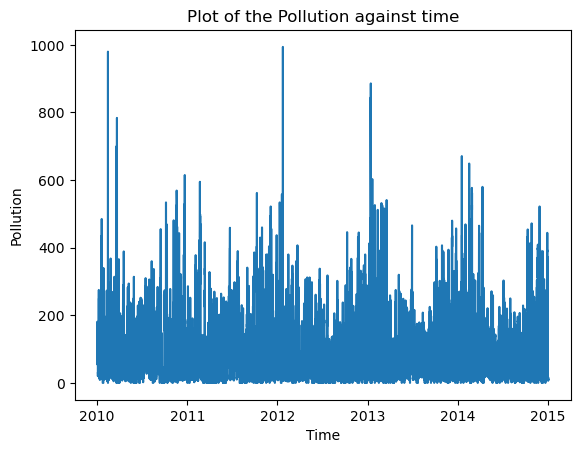

In [7]:
variable_of_interest = data['pollution']


plt.plot(variable_of_interest)
plt.title('Plot of the Pollution against time')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.show()

Taking a look at the correlation graphs for the pollution variable so we can decide how many lags we need to include

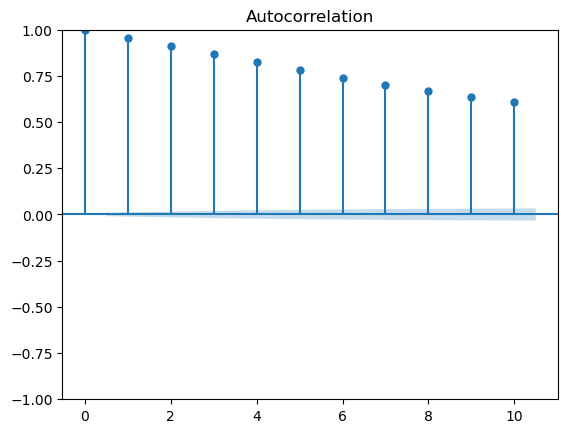

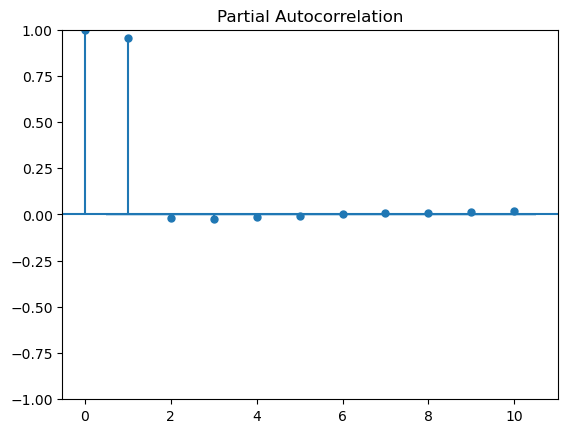

In [8]:
plot_acf(data['pollution'].dropna(), lags=10)
plt.show()

plot_pacf(data['pollution'].dropna(), lags=10)
plt.show()

Seems only the previous value has any real impact so we can take p = 1

Create training and test splits

In [12]:
forecast_length = len(data) // 10

# Creating an 80/10/10 train, validation, test split 
# We have that the first 10% of the dataset is validation so we can use the test data effectively when forecasting
# train_df, validation_df, test_df = df[0: 8*forecast_length], df[8*forecast_length: 9*forecast_length], df[9*forecast_length:]
validation_df, train_df, test_df = data[0: forecast_length], data[forecast_length: 9*forecast_length], data[9*forecast_length:]

In [ ]:
model = ARIMA(train_df['pollution'], order=(1, 0, 2))
arima_model = model.fit()

c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = arima_model.forecast(steps=10)